In [4]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [6]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
# print(X)
# print(y)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [7]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

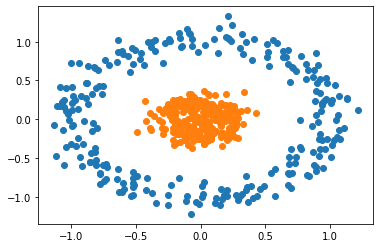

In [8]:
scatter_plot()

In [9]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [68]:
torch.manual_seed(2)
model = Model(2, 8, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717],
        [ 0.1614, -0.6260],
        [ 0.0929,  0.0470],
        [-0.1555,  0.5782],
        [ 0.0472,  0.2932]], requires_grad=True), Parameter containing:
tensor([ 0.2992, -0.4171, -0.2718,  0.6800, -0.6926, -0.0480, -0.0560,  0.5016],
       requires_grad=True), Parameter containing:
tensor([[-0.0336,  0.0931, -0.0170, -0.1980, -0.2004, -0.1718, -0.3212, -0.2294]],
       requires_grad=True), Parameter containing:
tensor([0.0832], requires_grad=True)]


In [69]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [70]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch:', i, 'loss', loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7225067019462585
epoch: 1 loss 0.6929618120193481
epoch: 2 loss 0.7067460417747498
epoch: 3 loss 0.7079436779022217
epoch: 4 loss 0.6985103487968445
epoch: 5 loss 0.6918949484825134
epoch: 6 loss 0.6924397349357605
epoch: 7 loss 0.6958663463592529
epoch: 8 loss 0.6964300274848938
epoch: 9 loss 0.6931023001670837
epoch: 10 loss 0.6883785724639893
epoch: 11 loss 0.6847785115242004
epoch: 12 loss 0.6829746961593628
epoch: 13 loss 0.6818445324897766
epoch: 14 loss 0.6797596216201782
epoch: 15 loss 0.6758688688278198
epoch: 16 loss 0.6704133749008179
epoch: 17 loss 0.664190411567688
epoch: 18 loss 0.6578391194343567
epoch: 19 loss 0.6514456272125244
epoch: 20 loss 0.6446141004562378
epoch: 21 loss 0.6368377208709717
epoch: 22 loss 0.6278371810913086
epoch: 23 loss 0.6176628470420837
epoch: 24 loss 0.6065754890441895
epoch: 25 loss 0.5948373675346375
epoch: 26 loss 0.5825417041778564
epoch: 27 loss 0.5695547461509705
epoch: 28 loss 0.555584728717804
epoch: 29 loss 0.540329754

Text(0.5, 0, 'epochs')

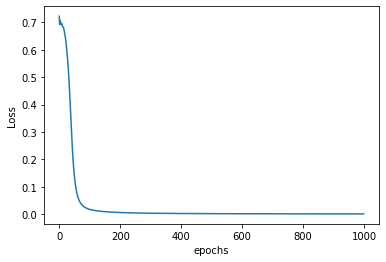

In [71]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [84]:
def plot_decision_boundary(X, y):
  boundary = 0.25
  x_span = np.linspace(min(X[:, 0] - boundary), max(X[:, 0] + boundary)) # linspace default num = 50
  # print(x_span)
  # print(x_span.size)
  y_span = np.linspace(min(X[:, 1] -boundary), max(X[:, 1] + boundary)) # linspace default num = 50
  # print(y_span)
  # print(y_span.size) 
  # print()
  xx, yy = np.meshgrid(x_span, y_span) # cartisian product, xx: 50 * 50, yy: 50 * 50
  # print(xx)
  # print(xx.size)
  # print(yy)
  # print(yy.size)
  # print()
  xx.ravel(), yy.ravel() # 2500, 2500
  # print(xx.ravel()) 
  # print(xx.ravel().size)
  # print(yy.ravel())
  # print(yy.ravel().size)
  # print()

  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # np.c_ concat
  
  pred_func = model.forward(grid)
  # print(xx.shape) # 50 * 50
  z = pred_func.view(xx.shape).detach().numpy() # zone
  # print(z)
  # print()
  plt.contourf(xx, yy, z)
  scatter_plot()

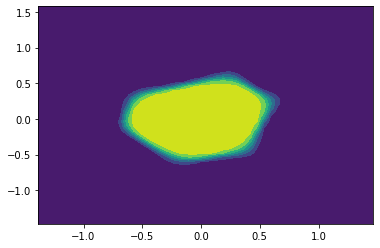

In [85]:
plot_decision_boundary(X, y)

Prediction:  1


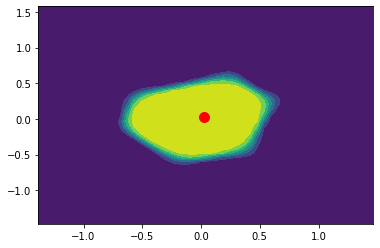

In [83]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction: ', prediction)
plot_decision_boundary(X, y)